# Persiapan Data

### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import math
# Feature Engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# Regression
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
# Clustering
from sklearn.cluster import KMeans
# Cross-Validation
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.metrics import silhouette_score
pd.options.display.float_format = '{:.3f}'.format

### Load Data

In [2]:
df_churn = pd.read_csv('churn.csv')
df_churn.head()
# df_churn.info()
# df_churn.columns

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.000,NaN,No,1.000,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,5575-GNVDE,Male,0.000,No,No,34.000,One year,No,Mailed check,56.950,1889.500,No
2,3668-QPYBK,Male,0.000,No,No,2.000,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,7795-CFOCW,Male,0.000,No,No,45.000,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,9237-HQITU,Female,0.000,No,No,2.000,Month-to-month,Yes,Electronic check,70.700,151.650,Yes


Data 'churn.csv' sebelum cleaning memiliki vitur dan tipe data sebagai berikut: <br>

Object :
* customerID 
* Gender 
* Partner 
* Dependents
* Contract
* PaperlessBilling
* PaymentMethode
* Churn

float :
* SeniorCitizen
* Tenure
* MonthlyCharges
* TotalCharges

### Data Cleaning

In [3]:
# Check Missing and duplicate values
df_churn.isna().sum() # Check nan values
df_churn.duplicated().sum() # Check duplicated values

# Remove Duplicate Values
df_churn = df_churn.drop_duplicates(keep='first') # Remove duplicates

# Missing Values Handling
df_churn = df_churn.dropna() 
# Proses ini dilakukan karena missing value hanya berjumlahkan 1% dataset dan tidak signifikan mengganggu distribusi

# Data Manipulation
# Drop customerID
df_churn = df_churn.drop('customerID', axis=1)

# Encoding
df_churn['Churn'] = df_churn['Churn'].replace({'Yes' : 1,'No' : 0 })
df_churn['Partner'] = df_churn['Partner'].replace({'Yes': 1, 'No' : 0})
df_churn['Dependents'] = df_churn['Dependents'].replace({'Yes' : 1, 'No' : 0})
df_churn['PaperlessBilling'] = df_churn['PaperlessBilling'].replace({'Yes' : 1, 'No' : 0})

C:\Users\Arya Adhy\AppData\Local\Temp\ipykernel_24820\1708820645.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn['Churn'] = df_churn['Churn'].replace({'Yes' : 1,'No' : 0 })
C:\Users\Arya Adhy\AppData\Local\Temp\ipykernel_24820\1708820645.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn['Partner'] = df_churn['Partner'].replace({'Yes': 1, 'No' : 0})
C:\Users\Arya Adhy\AppData\Local\Temp\ipykernel_24820\1708820645.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a

### Distribution

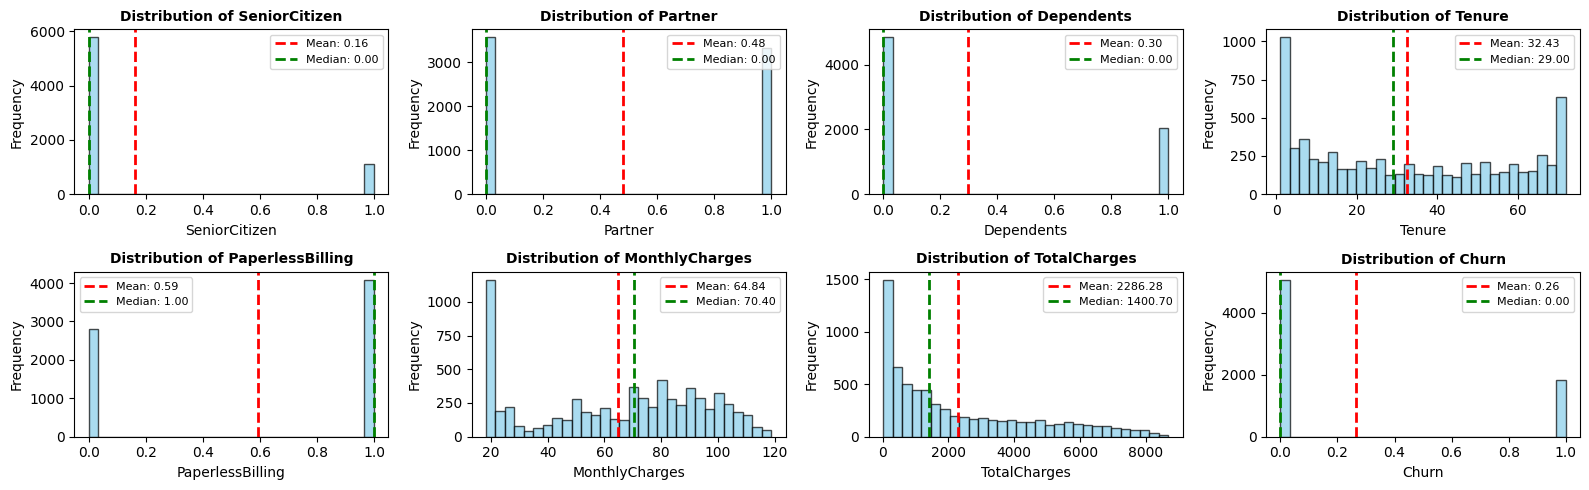

In [4]:
numeric_columns = df_churn.select_dtypes(include=["int", "float"]).columns
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    axes[idx].hist(df_churn[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

    mean_val = df_churn[col].mean()
    median_val = df_churn[col].median()

    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

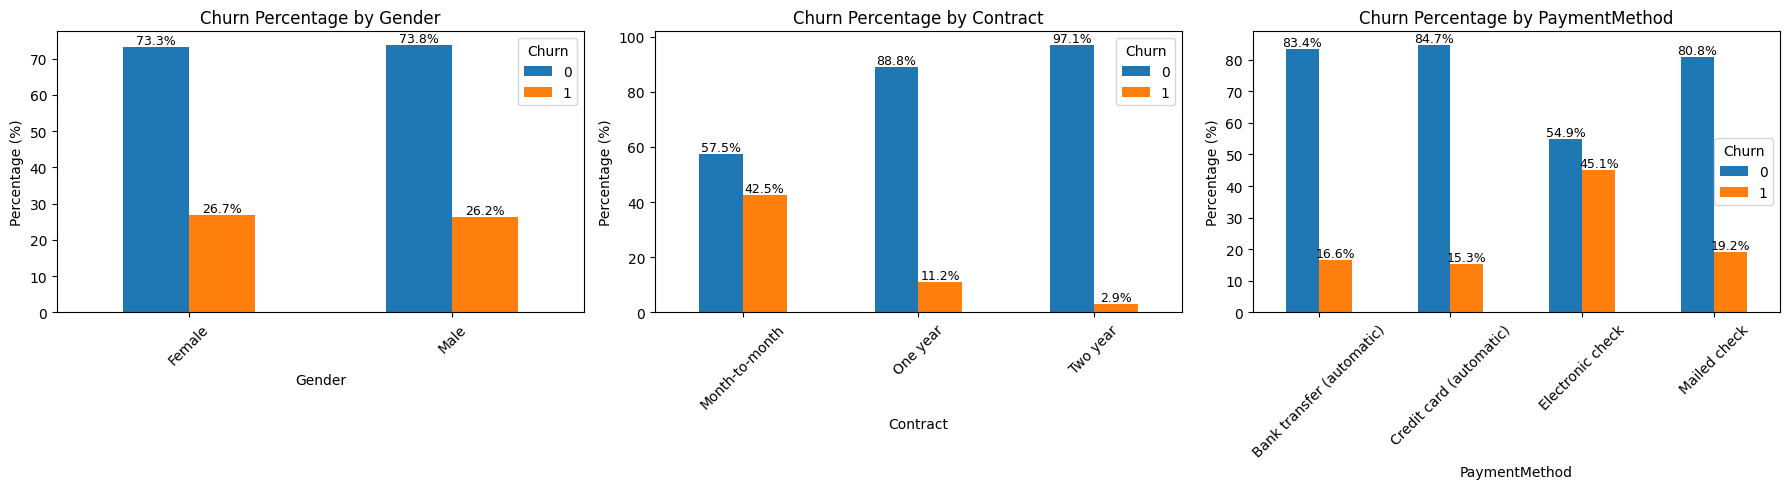

In [5]:
categorical_cols = df_churn.select_dtypes(include=["object"]).columns
# Subplot layout
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    # Crosstab with percentage
    ct = pd.crosstab(df_churn[col],df_churn['Churn'], normalize='index') * 100

    # Plot
    ct.plot(kind='bar', ax=ax)

    # Titles & labels
    ax.set_title(f'Churn Percentage by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage (%)')
    ax.tick_params(axis='x', rotation=45)

    # 🔹 Add percentage labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Pembagian Dataset

### Train Test Split

In [6]:
# Target
y = df_churn['Churn']

# Feature
X = df_churn.drop('Churn', axis=1).copy()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=890)

### Categorical feature vs target

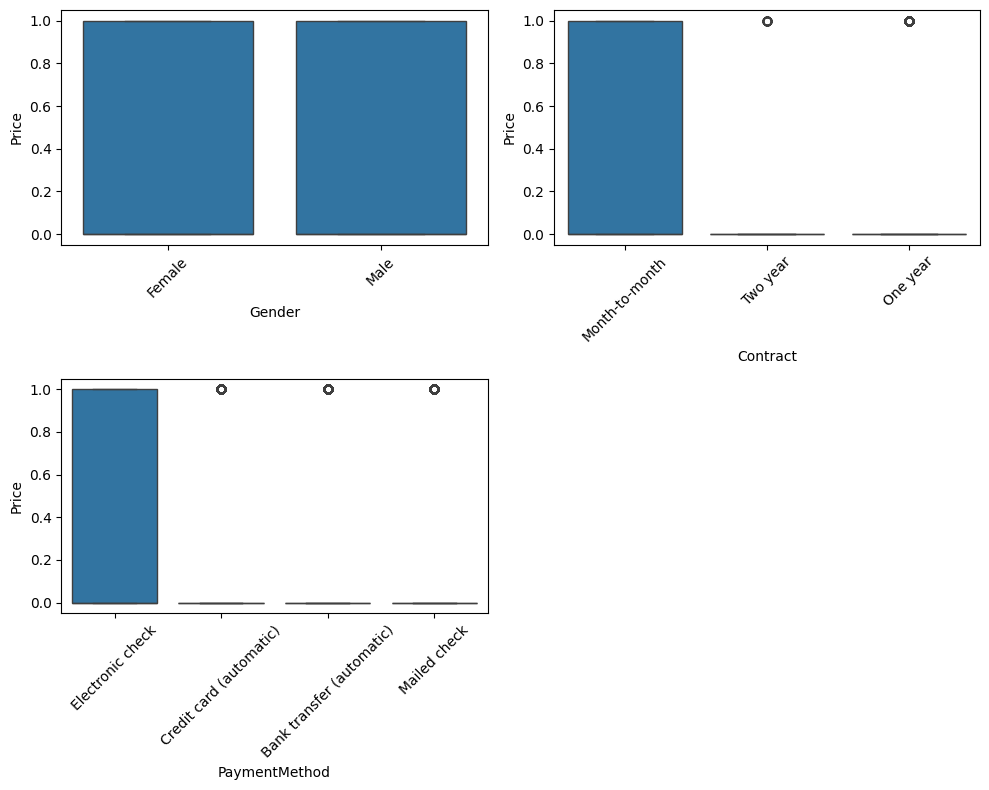

In [7]:
df_train = pd.concat([X_train, y_train], axis = 1)
cols = list(df_train.select_dtypes('object').columns)
n_cols = 2
n_rows = math.ceil(len(cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.boxplot(
        x=df_train[col],
        y=y_train,
        ax=axes[i]
    )
    axes[i].set_ylabel("Price")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)
# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### Scalling Numerical Variable

In [8]:
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(['int','float']))
X_test_scaled = scaler.transform(X_test.select_dtypes(['int','float']))

# Convert back to DataFrames with same columns and index
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.select_dtypes(['int', 'float']).columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.select_dtypes(['int', 'float']).columns,
    index=X_test.index
)

X_train_scaled.head()

,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges
1458,-0.439,-0.958,-0.648,-1.155,-1.212,0.190,-0.880
383,-0.439,-0.958,-0.648,-1.278,0.825,0.870,-0.964
5357,-0.439,1.044,1.542,1.387,0.825,-0.164,0.763
6254,-0.439,-0.958,-0.648,-0.294,-1.212,-0.349,-0.375
2706,-0.439,1.044,1.542,-0.171,0.825,0.845,0.145


### Encoding Categorical Feature

In [9]:
encoder = OneHotEncoder(sparse_output=False, drop = 'first', handle_unknown = 'ignore')

# encode the categorical variable
X_train_encoded = encoder.fit_transform(X_train.select_dtypes('object'))
X_test_encoded = encoder.transform(X_test.select_dtypes('object'))

# Convert to DataFrame
X_train_encoded = pd.DataFrame(
    X_train_encoded,
    columns=encoder.get_feature_names_out(X_train.select_dtypes('object').columns),
    index=X_train.index
)

X_test_encoded = pd.DataFrame(
    X_test_encoded,
    columns=encoder.get_feature_names_out(X_test.select_dtypes('object').columns),
    index=X_test.index
)

X_train_encoded.head()

,Gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1458,0.000,0.000,0.000,0.000,1.000,0.000
383,1.000,0.000,0.000,1.000,0.000,0.000
5357,0.000,0.000,1.000,0.000,1.000,0.000
6254,0.000,1.000,0.000,0.000,1.000,0.000
2706,0.000,1.000,0.000,0.000,0.000,0.000


### Final Data dor Training Model

In [10]:
X_train_final = pd.concat([X_train_scaled, X_train_encoded], axis = 1)
X_test_final = pd.concat([X_test_scaled, X_test_encoded], axis = 1)

X_train_final

,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1458,-0.439,-0.958,-0.648,-1.155,-1.212,0.190,-0.880,0.000,0.000,0.000,0.000,1.000,0.000
383,-0.439,-0.958,-0.648,-1.278,0.825,0.870,-0.964,1.000,0.000,0.000,1.000,0.000,0.000
5357,-0.439,1.044,1.542,1.387,0.825,-0.164,0.763,0.000,0.000,1.000,0.000,1.000,0.000
6254,-0.439,-0.958,-0.648,-0.294,-1.212,-0.349,-0.375,0.000,1.000,0.000,0.000,1.000,0.000
2706,-0.439,1.044,1.542,-0.171,0.825,0.845,0.145,0.000,1.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,-0.439,-0.958,-0.648,-1.278,0.825,0.481,-0.969,0.000,0.000,0.000,0.000,0.000,1.000
980,-0.439,-0.958,-0.648,-1.278,0.825,0.729,-0.966,1.000,0.000,0.000,0.000,1.000,0.000
1153,2.280,1.044,-0.648,1.223,0.825,1.106,1.620,0.000,1.000,0.000,1.000,0.000,0.000
3926,-0.439,-0.958,-0.648,-0.950,-1.212,-1.497,-0.924,1.000,0.000,0.000,1.000,0.000,0.000


# Analisis Korelasi dan Seleksi Fitur

### Menganalisis Hubungan antar Fitur

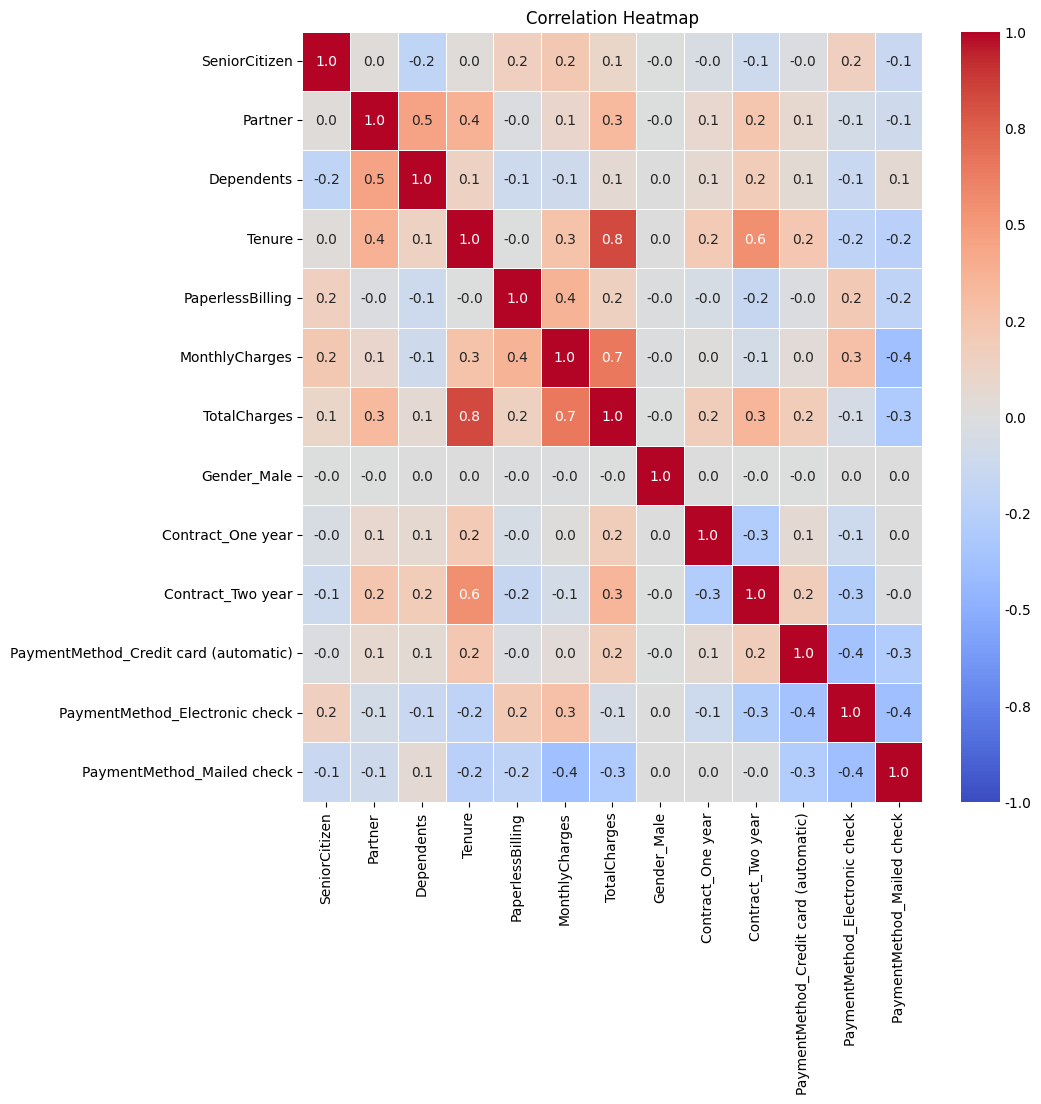

In [11]:
coor_data = X_train_final
coor_data = coor_data.corr()

plt.figure(figsize=(10,10))
ax = sns.heatmap(coor_data, annot=True, cmap='coolwarm', fmt='.1f', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={'format': '%.1f'})
ax.collections[0].colorbar.ax.tick_params(size=0)
plt.title("Correlation Heatmap")

plt.show()

Tenure dan Total Charges memiliki corelation yang tinggi (Potensi redundant) sehingga perlu dihapus salah satunya

### Menghapus total Charges 

In [12]:
X_train_final = X_train_final.drop('TotalCharges', axis=1)
X_test_final = X_test_final.drop('TotalCharges', axis=1)

X_train_final

,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,Gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1458,-0.439,-0.958,-0.648,-1.155,-1.212,0.190,0.000,0.000,0.000,0.000,1.000,0.000
383,-0.439,-0.958,-0.648,-1.278,0.825,0.870,1.000,0.000,0.000,1.000,0.000,0.000
5357,-0.439,1.044,1.542,1.387,0.825,-0.164,0.000,0.000,1.000,0.000,1.000,0.000
6254,-0.439,-0.958,-0.648,-0.294,-1.212,-0.349,0.000,1.000,0.000,0.000,1.000,0.000
2706,-0.439,1.044,1.542,-0.171,0.825,0.845,0.000,1.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
3530,-0.439,-0.958,-0.648,-1.278,0.825,0.481,0.000,0.000,0.000,0.000,0.000,1.000
980,-0.439,-0.958,-0.648,-1.278,0.825,0.729,1.000,0.000,0.000,0.000,1.000,0.000
1153,2.280,1.044,-0.648,1.223,0.825,1.106,0.000,1.000,0.000,1.000,0.000,0.000
3926,-0.439,-0.958,-0.648,-0.950,-1.212,-1.497,1.000,0.000,0.000,1.000,0.000,0.000


# Pemilihan Metrik Evaluasi

### Train Model

In [13]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

rf.fit(X_train_final, y_train)
xgb.fit(X_train_final, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [14]:
# Random Forest
y_pred_rf = rf.predict(X_test_final)
y_proba_rf = rf.predict_proba(X_test_final)[:, 1]

# XGBoost
y_pred_xgb = xgb.predict(X_test_final)
y_proba_xgb = xgb.predict_proba(X_test_final)[:, 1]

### Confusion Matrix

In [15]:
print("Confusion Matrix - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))

print("\nConfusion Matrix - XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))

# [[TN FP]
#  [FN TP]]

Confusion Matrix - Random Forest
[[943  86]
 [186 165]]

Confusion Matrix - XGBoost
[[912 117]
 [179 172]]


### Classification Report

In [16]:
print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Report")
print(classification_report(y_test, y_pred_xgb))

Random Forest Report
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1029
           1       0.66      0.47      0.55       351

    accuracy                           0.80      1380
   macro avg       0.75      0.69      0.71      1380
weighted avg       0.79      0.80      0.79      1380

XGBoost Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1029
           1       0.60      0.49      0.54       351

    accuracy                           0.79      1380
   macro avg       0.72      0.69      0.70      1380
weighted avg       0.77      0.79      0.78      1380



Dari Nilai diatas dapat ditarik kesimpulan awal :<br>
Random Forest <br>
1. Jika dilihat dari recall, dari semua churn asli hanya 47% yang tertangkap sisanya lolos (FN)
2. jika dilihat dari precission 66% benar diprediksi churn

XGBoost <br>
1. Walaupun recal dari XGBoost lebih tinggi tetapi memiliki perbandingan yang tipis dengan RF
2. Nilai precission lebih rendah tetapi dengan perbandingan yang tipis.

In [17]:
roc_rf = roc_auc_score(y_test, y_proba_rf)
roc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("ROC-AUC Random Forest:", roc_rf)
print("ROC-AUC XGBoost:", roc_xgb)

ROC-AUC Random Forest: 0.8460638630706657
ROC-AUC XGBoost: 0.8351329949969405


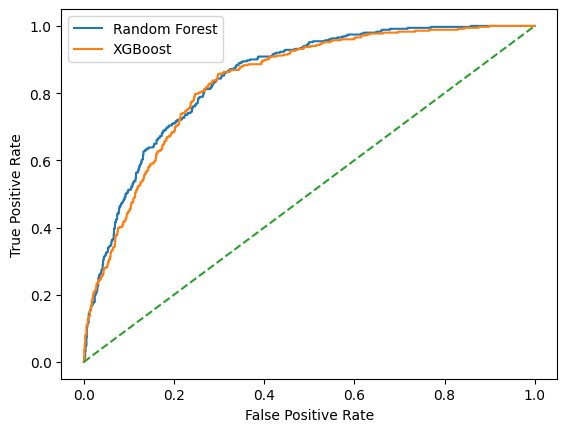

In [18]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

import matplotlib.pyplot as plt

plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0,1], [0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

dari perbandingan Random Forest dan XGBoost pada diagram diatas, kedua model memiliki perbandingan yang tipis, tidak signifikan dan masih banyak churn yang lolos. sehingga sebelum memilih perlu dilakukan proses Threshold tuning terlebih dahulu. untuk mencari threshold yang optimal pada masing-masing model.  

### Adjust Threshold

In [19]:
y_proba_rf = rf.predict_proba(X_test_final)[:, 1]
y_proba_xgb = xgb.predict_proba(X_test_final)[:, 1]

In [20]:
# apply threshold
def apply_threshold(y_proba, threshold):
    return np.where(y_proba >= threshold, 1, 0)

# Random Forest
for t in [0.5, 0.4, 0.3]:
    y_pred_rf_t = apply_threshold(y_proba_rf, t)
    print(f"\nRandom Forest - Threshold {t}")
    print(classification_report(y_test, y_pred_rf_t))

# XGBoost
for t in [0.5, 0.4, 0.3]:
    y_pred_xgb_t = apply_threshold(y_proba_xgb, t)
    print(f"\nXGBoost - Threshold {t}")
    print(classification_report(y_test, y_pred_xgb_t))


Random Forest - Threshold 0.5
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1029
           1       0.66      0.47      0.55       351

    accuracy                           0.80      1380
   macro avg       0.75      0.69      0.71      1380
weighted avg       0.79      0.80      0.79      1380


Random Forest - Threshold 0.4
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1029
           1       0.61      0.64      0.62       351

    accuracy                           0.80      1380
   macro avg       0.74      0.75      0.74      1380
weighted avg       0.81      0.80      0.80      1380


Random Forest - Threshold 0.3
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1029
           1       0.51      0.77      0.62       351

    accuracy                           0.76      1380
   macro avg       0.71      0.76  

karena perbedaan yang dimiliki keduanya tidak berbeda jauh, walaupun Random Forest memiliki nilai yang relatif lebih baik tetapi XGBoost memiliki banyak parameter yang dapat dilakukan proses tuning yang nantinya akan dilakukan di Hyperparameter Tuning. Sehingga untuk model yang digunakan adalah model XGBoost.

In [21]:
# Model Chossen!!!
y_pred_xgb_t = apply_threshold(y_proba_xgb, 0.4)

# Pelatihan Model dan Hyperparameter Tuning

In [22]:
# Recap dari hasil terakhir
y_pred_xgb_t = apply_threshold(y_proba_xgb, 0.4)
print(f"\nXGBoost - Threshold {0.4}")
print(classification_report(y_test, y_pred_xgb_t))


XGBoost - Threshold 0.4
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1029
           1       0.56      0.63      0.59       351

    accuracy                           0.78      1380
   macro avg       0.71      0.73      0.72      1380
weighted avg       0.79      0.78      0.78      1380



Dengan didapatkan data diatas dimana untuk nilai yang churn didapatkan sejumlah 351 dan yang tidak churn sebanyak 1029 sehingga yang dilakukan selanjutnya adalah perhitungan scale_pos_weight dengan nilai 1029/351 yaitu sebesar 2.93 atau 3 kali lebih fokus ke daerah churn. proses tuning ini dilakukan dengan beberapa ketentuan yaitu precission tidak anjlok dan menaikkan nilai recal.

In [23]:
# Tuning Model --1 scale_pos_weight
scale_post_weight = 1029/351



xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_post_weight,
    random_state=42,
    use_label_encoder=False
)

# parameter dict
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

In [24]:
# RandomizedSearchCV mencari nilai f1 score optimal
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_final, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Arya Adhy\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:08:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.7, 0.8, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], ...}"
,n_iter,30
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [25]:
# Take best Parameter
best_xgb = random_search.best_estimator_
random_search.best_params_

{'subsample': 0.7,
 'n_estimators': 400,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [26]:
# Best Patameter + Threshold 0.4
y_proba_xgb = best_xgb.predict_proba(X_test_final)[:, 1]
y_pred_xgb_04 = np.where(y_proba_xgb >= 0.4, 1, 0)

print("XGBoost Tuned - Threshold 0.4")
print(classification_report(y_test, y_pred_xgb_04))

XGBoost Tuned - Threshold 0.4
              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1029
           1       0.46      0.89      0.60       351

    accuracy                           0.70      1380
   macro avg       0.70      0.76      0.68      1380
weighted avg       0.82      0.70      0.72      1380



Dengan model yang telah dilakukan proses tuning nilai recal naik menjadi 0.89 dimana model akan lebih ketat dalam menilai data churn. data ini baik untuk bisnis yang sangat tidak ingin kehilangan customer. berikut beberapa insight yang dapat diambil dalam bisnis :

Manakah Model yang lebih baik untuk tujuan bisnis?<br>

Pilih XGBoost jika :<br>
* Kehilangan customer SANGAT mahal
* Biaya intervensi murah (email, push notif)
* Target utama: jangan sampai churn lolos
* `Ini cocok untuk early warning system`

Pilih Random Forest jika : <br>
* Intervensi mahal (diskon, call center)
* Tim terbatas
* False alarm = cost tinggi
* `Ini cocok untuk targeted retention campaign`

# Model Evaluation

### Predict Each Model

In [27]:
y_proba_rf = rf.predict_proba(X_test_final)[:, 1] # Random Forest
y_proba_xgb = xgb.predict_proba(X_test_final)[:, 1] # XGBoost Base
y_proba_xgb_tuned = best_xgb.predict_proba(X_test_final)[:, 1] # XGBoost Hyperparameter tuning

In [28]:
def regression_metrics(y_true, y_pred_proba):
    r2 = r2_score(y_true, y_pred_proba)
    mae = mean_absolute_error(y_true, y_pred_proba)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred_proba))
    
    # MAPE safe (hindari division by zero)
    mask = y_true != 0
    mape = np.mean(
        np.abs((y_true[mask] - y_pred_proba[mask]) / y_true[mask])
    ) * 100
    
    return r2, mae, rmse, mape

### Random Forest

In [29]:
rf_r2, rf_mae, rf_rmse, rf_mape = regression_metrics(y_test, y_proba_rf)

### XGBoost Base

In [30]:
xgb_r2, xgb_mae, xgb_rmse, xgb_mape = regression_metrics(y_test, y_proba_xgb)

### XGBoost Hyperparameter Tuning

In [31]:
xgbt_r2, xgbt_mae, xgbt_rmse, xgbt_mape = regression_metrics(
    y_test, y_proba_xgb_tuned
)

In [32]:
df_eval = pd.DataFrame({
    'Model': [
        'Random Forest',
        'XGBoost',
        'XGBoost Tuned'
    ],
    'R2': [rf_r2, xgb_r2, xgbt_r2],
    'MAE': [rf_mae, xgb_mae, xgbt_mae],
    'RMSE': [rf_rmse, xgb_rmse, xgbt_rmse],
    'MAPE (%)': [rf_mape, xgb_mape, xgbt_mape]
})

df_eval

,Model,R2,MAE,RMSE,MAPE (%)
0,Random Forest,0.292,0.278,0.366,52.947
1,XGBoost,0.266,0.262,0.373,50.074
2,XGBoost Tuned,0.140,0.320,0.404,32.002


Interpretasi Model:<br>
* MAE & RMSE<br>
Random Forest(Threshold 0.4) dan XGBoost base (kita sebut `Model Base`) memiliki nilai Evaluation yang relatif sama, MAE dan RMSE yang lebih kecil dibandingkan XGBoost hasil hyperparameter (kita sebut `XGboost Tuning`) yang menandakan bahwa `Model Base` lebih akurat.
* R²<br>
Nilai R-Square yang lebih tinggi menandakan bahwa terdapat nilai yang lebih informatif, sehingga `Model Base` lebih informatif .
* MAPE <br>
Nilai lebih kecil menandakan model lebih stabil, sehingga `Model Base` lebih stabil.

Interpretasi berdasarkan tujuan bisnis<br>

*  Jika dilihat dari kacamata bisnis yang berbeda, `XGboost Tuning` lebih unggul dibandingkan `Model Base` contohnya jika Kehilangan customer SANGAT mahal, biaya intervensi murah (email, push notif) dan Target utama bisnis adalah jangan sampai churn lolos maka `XGboost Tuning` lebih cocok.

# Reflection Question 

1. Jika model dilatih tanpa persiapan data maka model akan lebih besar kemungkinan menghasilkan error yang lebih besar dibandingkan dengan data yang dilakukan cleaning terlebih dahulu. hal tersebut dapat terjadi karena interpretasi model dalam melatih adalah dengan mengubah data menjadi bentuk yang dipahami oleh model untuk training. Sedangkan dengan melakukan proses clening terlebih dahulu kita dapat membantu komputer dalam meringankan kinerja komputasi.
2. Feature selection penting karena fitur yang banyak atau terlalu kompleks dapat menyebabkan model overvitting. overfitting sama dengan terlalu mendetail sehingga tidak ada kompensasi terhadap beberapa aksi, apalagi penilaian terhadap binary target. bisajadi sebagian data tidak akan lolos dan menyebabkan clausa melenceng karena tidak ada kompensasi.